# ISLP – Chapter 2, Question 9

**Dataset:** Auto

**Objective:** Analyze predictors, manipulate dataset, and investigate relationship between predictors and MPG

**Note:** The solutions first present the answer, the followed by the code for the solution

In [5]:
# Importing libraries and loading dataframe
import pandas as pd
import ISLP
from charset_normalizer.cli import query_yes_no

df = ISLP.load_data("Auto")

# Solution - (a)
Since there are no null values in any columns (as seen by the output of running df.info()), we know all rows are valid for our analysis here on out. By the name of the columns, along with their data types and their information found in the book's dataset documentation, we know that this is the following distribution of qualitative and quantitative predictors:
* **Quantitative:** cylinders, displacement, horsepower, weight, acceleration, year
* **Qualitative:** origin


Note on origin: although encoded as an integer, origin is qualitative as stated in the [ISLP Auto dataset documentation](https://islp.readthedocs.io/en/latest/datasets/Auto.html), where we find that 1 encodes the USA as the origin, 2 Europe, and 3 Japan. Also, this can be inferred since origin is inherently qualitative data, as it does not encode a quantity.

In [20]:
# Problem (a) code

# Inspect column types and non-null counts to identify qualitative vs quantitative predictors
info_df = df.info(verbose=True)
info_df

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 35.7+ KB


# Solution - (b)
We can calculate the range of each quantitative predictor by subtracting the maximum and minimum values of each one, using Pandas' builtin .agg(), which yields the ranges:
| Predictor     | Range  |
|---------------|--------|
| cylinders     | 5.0    |
| displacement  | 387.0  |
| horsepower    | 184.0  |
| weight        | 3527.0 |
| acceleration  | 16.8   |
| year          | 12.0   |

In [37]:
# Problem (b) code

# Create list of quantitative predictors
quantitative_columns = [
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "year"
]

# Use pandas agg function to aggregate quantitative predictor columns by a lambda range function
range_df = df[quantitative_columns].agg(func=lambda x: x.max() - x.min()).to_frame()
range_df.rename(columns={0: "range"}, inplace=True)
range_df

,range
cylinders,5.0
displacement,387.0
horsepower,184.0
weight,3527.0
acceleration,16.8
year,12.0


# Solution - (c)
We can find the standard deviation and mean of each quantitative predictor by running Pandas' .describe() builtin, which yields:
| Predictor     | Std Dev       | Mean        |
|---------------|--------------|------------|
| cylinders     | 1.705783     | 5.471939   |
| displacement  | 104.644004   | 194.411990 |
| horsepower    | 38.491160    | 104.469388 |
| weight        | 849.402560   | 2977.584184|
| acceleration  | 2.758864     | 15.541327  |
| year          | 3.683737     | 75.979592  |

In [45]:
# Problem (c) code

# Create list of quantitative predictors
quantitative_columns = [
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "year"
]

# Use pandas describe function to calculate standard deviation and mean of each quantitative predictor
std_and_mean_df = df[quantitative_columns].describe().T
std_and_mean_df[["std", "mean"]]

,std,mean
cylinders,1.705783,5.471939
displacement,104.644004,194.411990
horsepower,38.491160,104.469388
weight,849.402560,2977.584184
acceleration,2.758864,15.541327
year,3.683737,75.979592


# Solution - (d)
We can find the desired range, standard deviation, and mean of each quantitative predictor by dropping the required rows using running Pandas' .drop() method and then passing the indexes of the rows 10 through 85, and then repeating the methods from problems (b) and (c), which yields:
| Predictor     | Range  | Std Dev    | Mean        |
|---------------|--------|------------|-------------|
| cylinders     | 5.0    | 1.637315   | 5.283688    |
| displacement  | 387.0  | 96.164263  | 180.120567  |
| horsepower    | 184.0  | 34.197280  | 99.039007   |
| weight        | 3197.0 | 793.236373 | 2884.939716 |
| acceleration  | 16.1   | 2.601575   | 15.713121   |
| year          | 12.0   | 3.017394   | 77.482270   |

In [41]:
# Problem (d) code

# Create list of quantitative predictors
quantitative_columns = [
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "year"
]

# Use pandas drop and index to drop the rows with index from 10 through 85
dropped_df = df.drop(df.index[10:86])[quantitative_columns]

# Use the previously seen .agg() and .describe() to calculate the range, standard deviation, and mean of each quantitative predictor
dropped_range_df = dropped_df.agg(func=lambda x: x.max() - x.min()).to_frame()
dropped_range_df.rename(columns={0: "range"}, inplace=True)
dropped_description_df = dropped_df[quantitative_columns].describe().T

# Join both dataframes and display the statistical description of the predictors
statistics_df = dropped_range_df.join(dropped_description_df)
statistics_df[["range", "std", "mean"]]

,range,std,mean
cylinders,5.0,1.637315,5.283688
displacement,387.0,96.164263,180.120567
horsepower,184.0,34.197280,99.039007
weight,3197.0,793.236373,2884.939716
acceleration,16.1,2.601575,15.713121
year,12.0,3.017394,77.482270


# Solution - (e)
We can explore the relationships in the dataset by creating a plot matrix, which shows the scatter relationship between all metrics in the data by using Pandas' plotting .scatter_matrix() method using the full dataset. This yields:

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

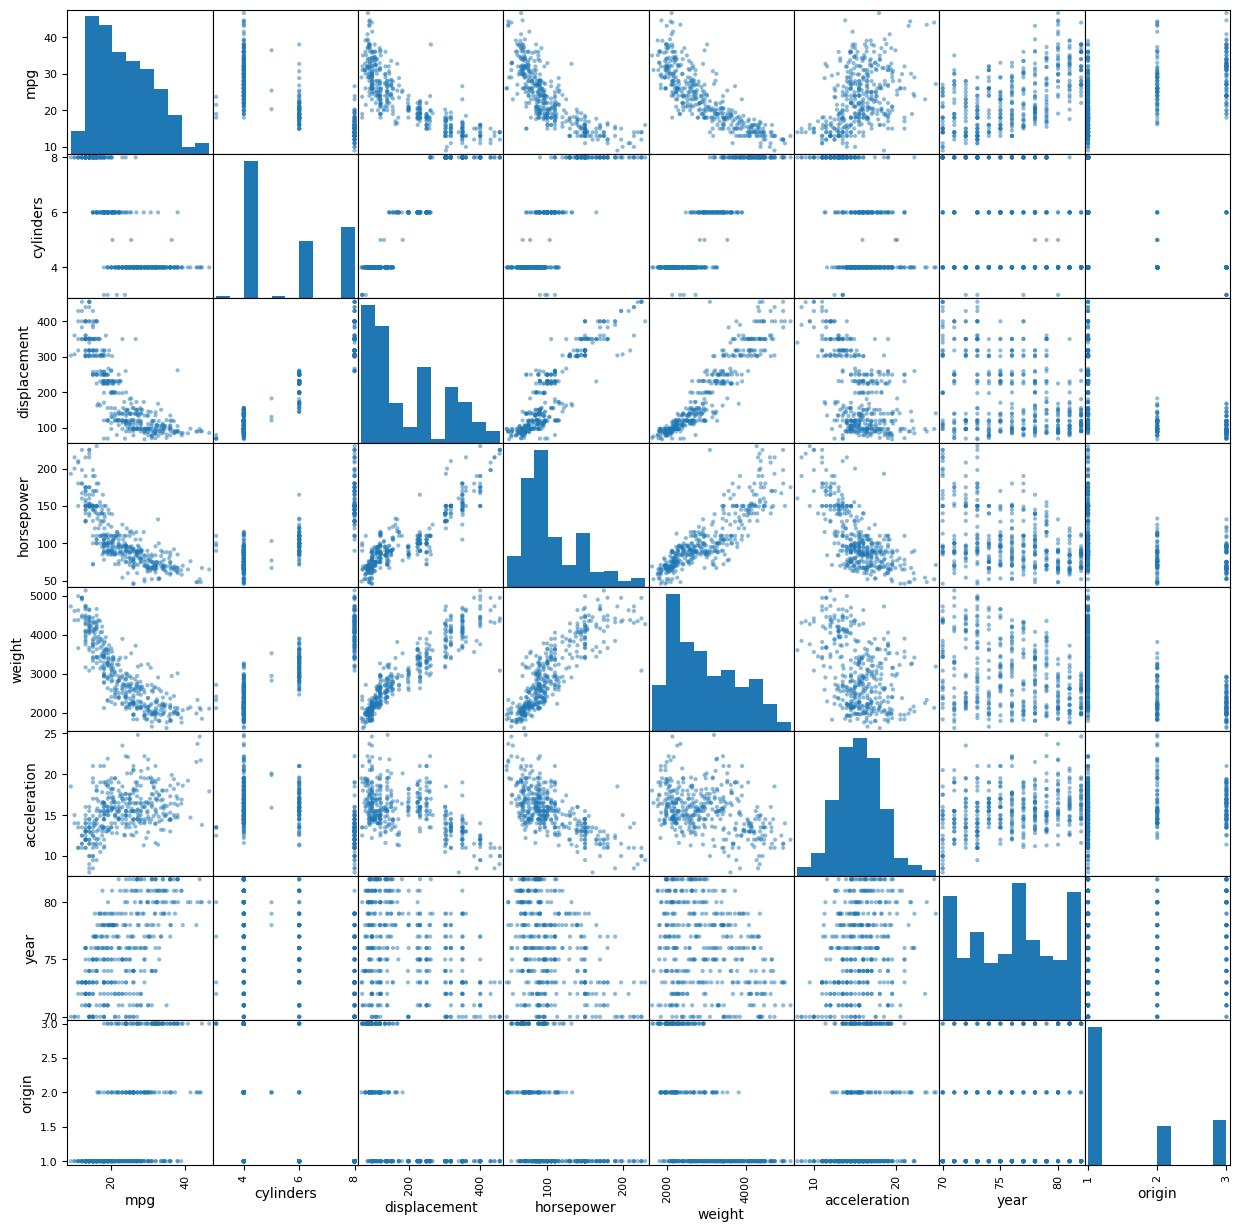

In [44]:
# Display the scatter plots of all quantities against all other possible quantities
pd.plotting.scatter_matrix(df, figsize=(15, 15))

# Solution - (f)
Having seen the plots of all other predictors versus mpg above, we can see that some predictors seem to have a stronger correlation with mpg. To confirm this, we can build the correlation matrix between all the predictors with Pandas' .corr() method, which shows that the correlation between mpg and each predictor is:
| Predictor     | Correlation with mpg |
|---------------|----------------------|
| cylinders     | -0.777618 |
| displacement  | -0.805127 |
| horsepower    | -0.778427 |
| weight        | -0.832244 |
| acceleration  | 0.423329  |
| year          | 0.580541  |

This shows mpg has a **strong negative correlation with cylinders, displacement, horsepower, and weight**, ranging from -0.78 to -0.83 correlation, while showing a **weaker positive correlation with acceleration and year**, respectively of 0.42 and 0.58.

In [52]:
# Find and display the correlation between mpg and quantitative predictors
correlation_df = df.corr().drop(["mpg", "origin"])
correlation_df["mpg"]

cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
year            0.580541
Name: mpg, dtype: float64